In [1]:
from omegaconf import DictConfig, OmegaConf
from hydra import initialize, compose
with initialize(config_path="../conf", version_base="1.3"):
    cfg = compose(config_name="config_data_creation_randompos")
    print(OmegaConf.to_yaml(cfg))

paths:
  root_abs: /home/alex/dev/python/tx_rbc/tx_shared/
  data_from_notebooks: ../data/
  constructed_dataset: data/constructed_datasets/copy_paste_microfluidic
  constructed_dataset_randompos: data/constructed_datasets/copy_paste_random_pos
  constructed_dataset_test: data/constructed_datasets/copy_paste_microfluidic_test
  liang_2024_from_root: data/2024_liang
  kihm_2018_from_root: data/2018_plos
  nouaman_from_root: data/2024_nouaman
  nouaman_videos_from_root: data/videos/nouaman_2024
  naples_tif_stack: data/tomaiuolo_naples
dataset_distribution:
  train_liang: 10
  train_nouaman: 80
  train_kihm: 70
  test_liang: 90
  test_nouaman: 10
  test_kihm: 15
  val_liang: 0
  val_nouaman: 10
  val_kihm: 15
factors:
  noise_fn:
  - none
  - gaussian
  - salt_pepper
  - random
  croissant_count:
  - 3
  - 4
  slipper_count:
  - 3
  - 4
  object_count:
  - 3
  - 4
  walls:
  - true
  - false
  walls_gray:
  - true
  - false
  lines:
  - true
  - false
  artifacts:
  - true
  - false



In [15]:
import pandas as pd
import os

#df = pd.read_csv(os.path.join(cfg.paths.root_abs, "data/constructed_datasets/copy_paste_random_nosuperposition/dataset.csv"))
df = pd.read_csv(os.path.join(cfg.paths.root_abs, "data/constructed_datasets/dataset_copy_paste_microfluidic/dataset_microfluidic_grace.csv"))

In [16]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   filename         8000 non-null   object 
 1   path             8000 non-null   object 
 2   noise_fn         8000 non-null   object 
 3   croissant_count  8000 non-null   float64
 4   slipper_count    8000 non-null   float64
 5   object_count     8000 non-null   float64
 6   lines            8000 non-null   bool   
 7   artifacts        8000 non-null   bool   
 8   channel_state    8000 non-null   object 
dtypes: bool(2), float64(3), object(4)
memory usage: 453.3+ KB
None
        filename                                               path  \
count       8000                                               8000   
unique      4000                                               8000   
top     0000.png  ./data/constructed_datasets/copy_paste_microfl...   
freq           3                    

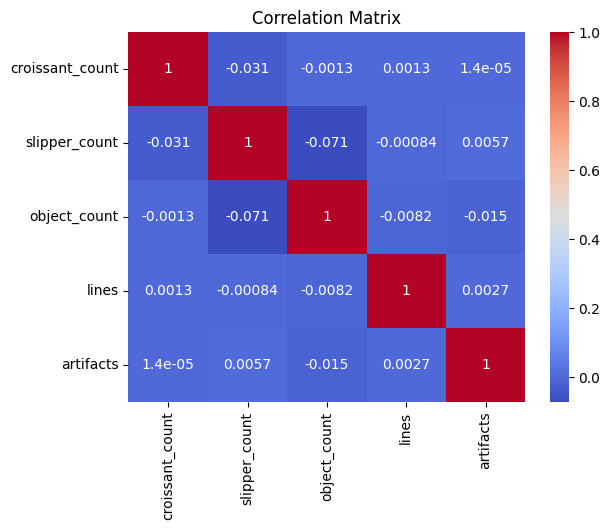

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson correlation
corr_matrix = df.corr(numeric_only=True)
#plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df.select_dtypes(include='number'))
pca = PCA()
pca.fit(X_scaled)

import numpy as np
explained_var = np.cumsum(pca.explained_variance_ratio_)
print("Explained variance by components:", explained_var)

Explained variance by components: [0.36883081 0.71488001 1.        ]


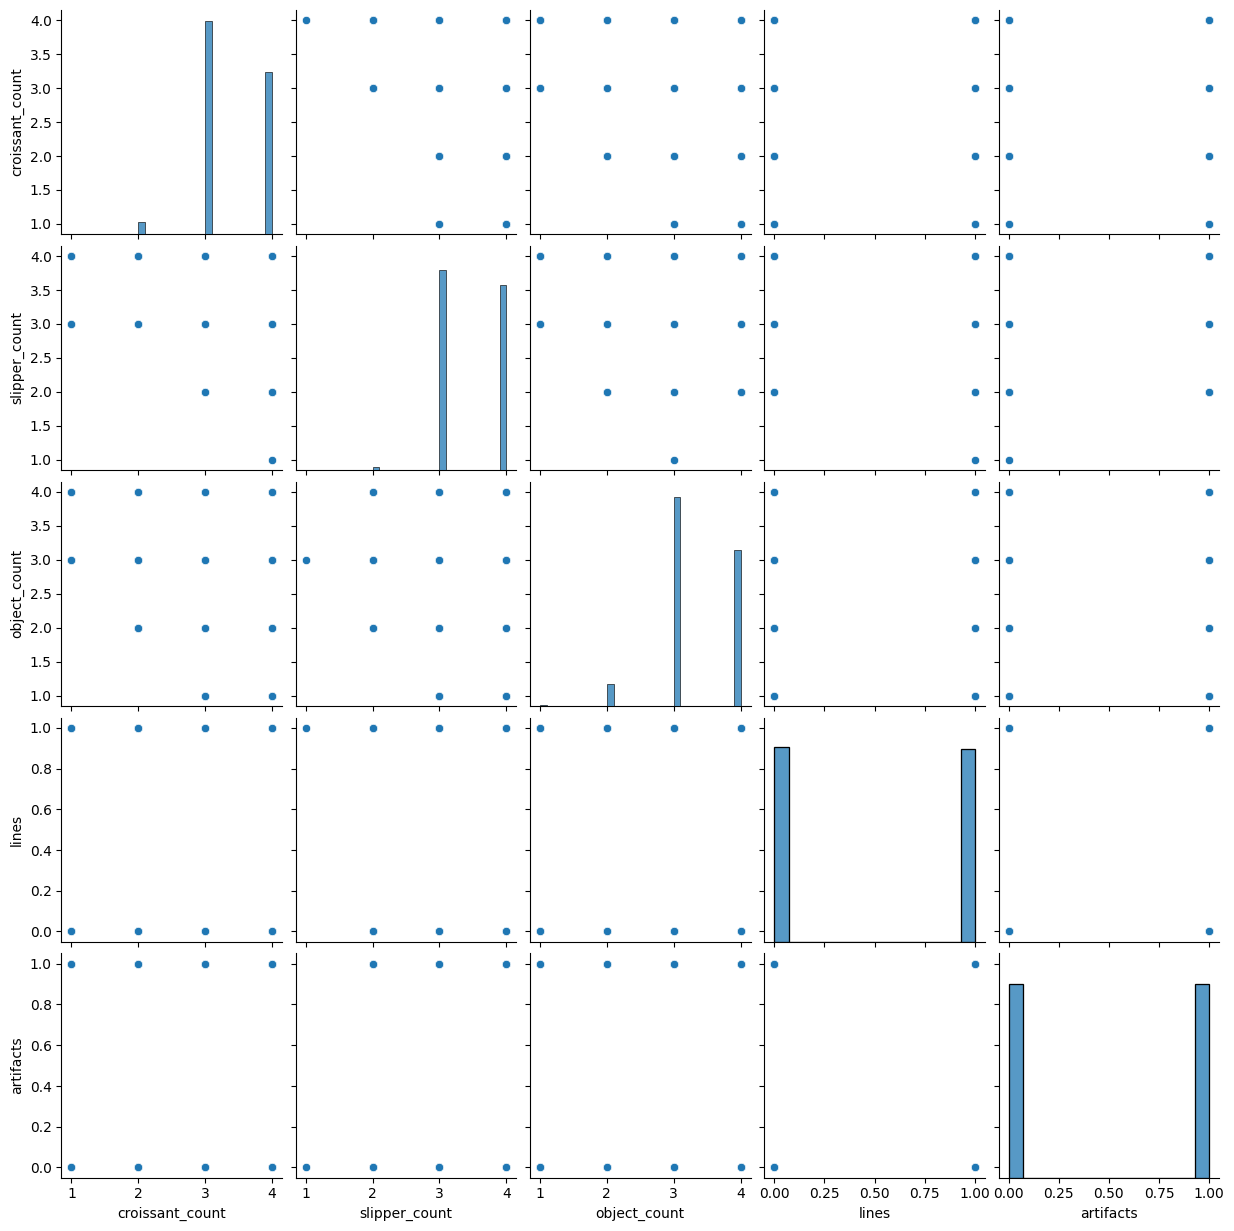

In [8]:
import seaborn as sns
sns.pairplot(df)